In [7]:
import pandas as pd

Load the dataset

In [8]:
data = pd.read_csv("../dataset/sarcasm_detection_dataset.csv")

In [9]:
data = data.drop(columns=["Unnamed: 0"])


In [10]:
data.head()

,label,comment,parent_comment,child_is_negative,child_is_neutral,child_is_positive,child_neg_score,child_neu_score,child_pos_score,parent_is_negative,parent_is_neutral,parent_is_positive,parent_neg_score,parent_neu_score,parent_pos_score
0,1,But they'll have all those reviews!,"The dumb thing is, they are risking their sell...",1,0,0,0.340820,0.318818,0.340363,1,0,0,0.645659,0.176749,0.177592
1,1,wow it is totally unreasonable to assume that ...,Clinton campaign accuses FBI of 'blatant doubl...,1,0,0,0.549341,0.119822,0.330837,0,1,0,0.114548,0.785739,0.099713
2,1,Ho ho ho... But Melania said that there is no ...,Anyone else think that it was interesting the ...,1,0,0,0.170887,0.411069,0.418044,1,0,0,0.080349,0.097847,0.821804
3,1,I can't wait until @potus starts a twitter war...,Here's what happens when Obama gives up his Tw...,0,1,0,0.066330,0.844850,0.088820,0,1,0,0.115145,0.660342,0.224513
4,1,gotta love the teachers who give exams on the ...,Monday night Drinking thread Brought to You by...,1,0,0,0.068220,0.180733,0.751048,0,1,0,0.100784,0.806068,0.093147


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack


df = data

# Split data into training and test set
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Vectorize 'comment'
comment_vectorizer = TfidfVectorizer()
X_train_comment = comment_vectorizer.fit_transform(train_df['comment'])
X_test_comment = comment_vectorizer.transform(test_df['comment'])

# Vectorize 'parent_comment'
parent_comment_vectorizer = TfidfVectorizer()
X_train_parent_comment = parent_comment_vectorizer.fit_transform(train_df['parent_comment'])
X_test_parent_comment = parent_comment_vectorizer.transform(test_df['parent_comment'])

# Other features
other_features_cols = ['child_is_negative', 'child_is_neutral', 'child_is_positive', 'child_neg_score', 
                       'child_neu_score', 'child_pos_score', 'parent_is_negative', 'parent_is_neutral', 
                       'parent_is_positive', 'parent_neg_score', 'parent_neu_score', 'parent_pos_score']
X_train_other = train_df[other_features_cols].values
X_test_other = test_df[other_features_cols].values


X_train = hstack([X_train_comment, X_train_parent_comment, X_train_other])
X_test = hstack([X_test_comment, X_test_parent_comment, X_test_other])

y_train = train_df['label']
y_test = test_df['label']


clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.66345
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      9965
           1       0.67      0.64      0.66     10035

    accuracy                           0.66     20000
   macro avg       0.66      0.66      0.66     20000
weighted avg       0.66      0.66      0.66     20000



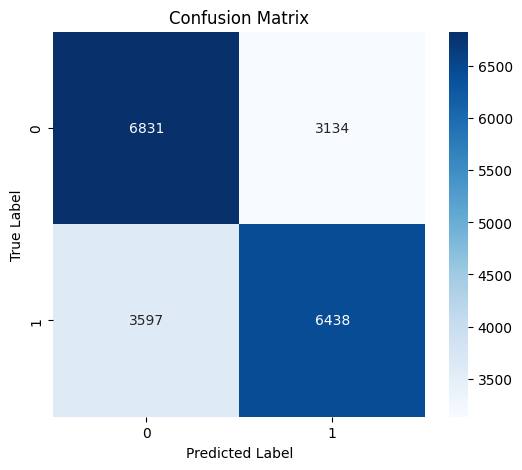

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix', cmap='Blues'):
   
    # Compute confusion matrix
    matrix = confusion_matrix(y_true, y_pred, labels=classes)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, fmt='d', cmap=cmap, 
                xticklabels=classes, 
                yticklabels=classes)
    
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(y_test, y_pred, [0, 1])
